# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [33]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [34]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [36]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result =[]
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
        
    

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


In [ ]:
import networkx as g

#Se importa la libreria pyplot de matplotlib como plt

import matplotlib.pyplot as plt

Gra=g.Graph()

#Se crean los nodos:

#Gra.add_node("cuenca")

Gra.add_nodes_from(["Riobamba","Quito","Guayaquil"])

Gra.add_edge("Riobamba","Cuenca")

Gra.add_edge("Quito","Cuenca")


Gra.add_edge("Guayaquil","Cuenca")


Gra.add_edge("Quito","Riobamba")


Gra.add_edge("Cuenca","Riobamba")


Gra.add_edge("Riobamba","Quito")


Gra.add_edge("Guayaquil","Quito")


Gra.add_edge("Latacunga","Quito")


Gra.add_edge("Puyo","Quito")


Gra.add_edge("Machala","Guayaquil")


Gra.add_edge("Ambato","Guayaquil")


Gra.add_edge("Quito","Guayaquil")


Gra.add_edge("Cuenca","Guayaquil")


Gra.add_edge("Manta","Guayaquil")

Gra.add_edge("Latacunga","Quito")

Gra.add_edge("Ambato","Latacunga")

Gra.add_edge("Quito","Latacunga")

Gra.add_edge("Manta","Esmeraldas")

Gra.add_edge("Guayaquil","Manta")

Gra.add_edge("Puyo","Ambato")

Gra.add_edge("Guayaquil","Ambato")

Gra.add_edge("Latacunga","Ambato")

Gra.add_edge("Ambato","Puyo")

Gra.add_edge("Quito","Puyo")

Gra.add_edge("Guayaquil","Machala")

#Se dibuja el grafo

#nx.draw(G)
nx.draw(Gra, with_labels=True,node_size=800,width=3)

#Se muestra en pantalla

plt.show()

#Se muestra información de los nodos (cantidad, nodos)

print ("Nodos: ", Gra.number_of_nodes(), Gra.nodes())

#SE muestra información de los enlaces (cantidad, enlaces)

print ("Enlaces: ", Gra.number_of_edges(),Gra.edges())

## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


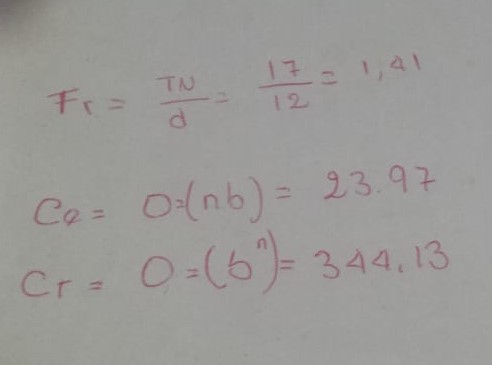

In [14]:
# Implementar



[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [2, 3, 1, 4], [2, 1, 3, 4], [1, 2, 3, 4]]


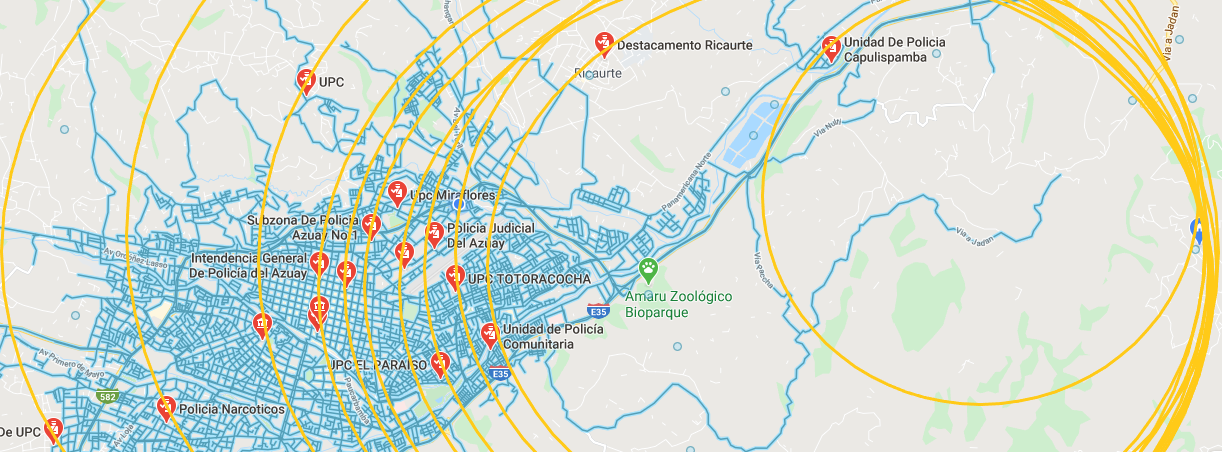

# Conclusiones